165.9494


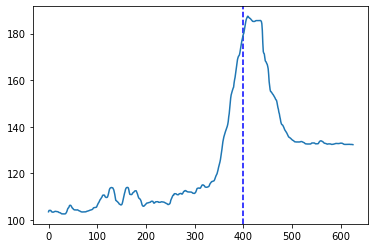

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

### variables de input 


dEdx =20 #muon stopping power in the material 
file = './rastert_dem_uni1-clean.txt' ## DEM file 

inicio = 380 # indice donde quiero empezar a analizar en el eje X 

fila = 120
punto_inicio=[50,fila]# punto desde donde se coloca el observador #punto_inicio[1] es el valor de fila, 
                     # y el que genera de atenuación y distancias para ayuda gráfica

xplotrango, yplotrango = 70, 250 #rango de plots


## línea de visión 
def recta(x_0, y_0, x_1,y_1,x): # todos los puntos son conocidos, la función bota un punto adelante 
    m=(y_1-y_0)/(x_1-x_0)
    y_recta= y_0+m*(x-x_0)     

    return y_recta 

def angle(x_0, y_0, x,y): # todos los puntos son conocidos, la función bota un punto adelante 
    angle = np.arctan((y-y_0)/(x-x_0))*180/np.pi

    return angle

#### SUPER IMPORTANTE 
def indice_final(inicio, array1, array2):  # inicio = x1, y1 , array1 = valores en y , array2 = valores de y 
                                           #con los cuales se va a intersectar 
    for i in range(inicio,len(array1)):           
        if (array1-array2)[i] >= 0: #la condicion. 
            indice_final=i
    return indice_final

#funcion para calcular la distancia entre dos puntos 
# p1 y p2 son array de dos dimensiones  que tiene los puntos (x,y)

def distancia(p1, p2): #la entrada     
    resto = p2**2-p1**2
    dist = math.sqrt(abs(resto[0])+ abs(resto[1]))  
    return dist  

##############################
## CARGAR LOS DATOS DEL RASTER 

df = pd.read_csv(file, sep =" ", header=None)
df = df.fillna(0)
df = df.drop(columns=626)#eliminar la última columna 
columnas = df.shape[1] 

##
##############################

##############################
## CREAR LOS INDICES 

#array con los valores de X que depende de el número de celdas que tiene la información GIS 
# el valor real debe salir de df_limpio.shape[1]
arr_x = np.linspace(0,columnas-1,columnas)
####  Puntos de la curva 
np_array = df.iloc[fila].to_numpy()
print(np_array[450])
plt.axvline(x = 400, color = 'b', label = 'Posición del detector', linestyle='dashed')
plt.plot(np_array)

#array con los valores de X 


In [122]:
##############################
## FUNCIONES PARA LA PROFUNDIDAD Y LA GRILLA DE PROFUNDIDAD

## funcion para calcular la distancia entre dos puntos para un arr_x, ptx inicial de observación y un 

def depth(arr_x, x1): # arr_x es el array de los índices en x (columnas);  x1 = inicio para 
    vec_recta = []
    #Obtener los límites 
    for j in range(0,len(arr_x)):        
        tm=recta(punto_inicio[0],punto_inicio[1],arr_x[x1], np_array[x1], arr_x[j]) 
        vec_recta.append(tm)
        recta_vec = np.asarray(vec_recta)   #genera la recta para obtener el P2
    

    lf= indice_final(inicio, np_array, recta_vec) # indice de intersección entre DM y P2
    
    int_i= np.asarray([x1,np_array[x1]])#convertir los puntos iniciales en el  array  PUNTO DE INICIO P1
    int_f= np.asarray([lf,np_array[lf]])#convertir los puntos finales en el  array P2
    depth_i = distancia(int_i, int_f) #cacula la distancia 
    
    return (depth_i, lf) #lf indice final donde acaba la línea de observación o el P2
    
    
## funcion que produce un vector con las profundidades para un arr_x, ptx inicial de observación 
def grilla_vertical(fila, ptx):  
    vec_fila =[] 
    
    for j in range(ptx,len(arr_x)):   
        
        profundidad = depth(arr_x, j)[0]        
        
        if profundidad != 0: 
            an=angle(punto_inicio[0],punto_inicio[1], arr_x[j], np_array[j])
            vec_fila.append([ptx, np_array[ptx], j, np_array[j], an, profundidad]) 
            #vec_fila.append(profundidad)
            #vec_fila(x1= ptx, y1= altura del ptx, an=angulo de la recta, profundida)
        else:
            break 
    
        #an=angle(punto_inicio[0],punto_inicio[1], arr_x[j], np_array[j])
        #vec_fila.append([ptx, np_array[ptx], j, np_array[j], an, profundidad])
    
 
    return (vec_fila, j)

#vec_grilla[0][i]: ingresamos a los valores de vec_fila

#punto_inicio_y = punto_inicio[1] 



In [118]:
gvert = grilla_vertical(fila,inicio)

print(len(gvert[0]))


29


In [123]:
gvert = grilla_vertical(fila,inicio)
gvert_theta = []
gvert_profundidad = []
gvert_altura= []
for n in range(0,len(gvert[0])): 
    gvert_altura.append(gvert[0][n][3])
    gvert_theta.append(gvert[0][n][4])
    gvert_profundidad.append(gvert[0][n][5])
     
indice_final_cima = grilla_vertical(fila,inicio)[1]

156.9811
187.4025


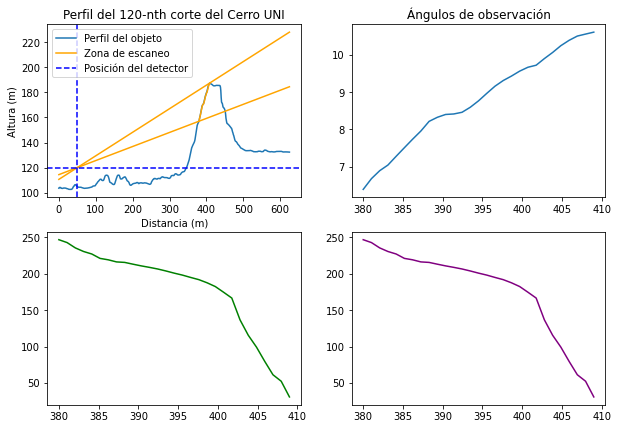

In [124]:
m = np.linspace(inicio,inicio+len(gvert[0]),len(gvert[0]))

ref_y_inicio =[]
ref_y_final  =[]

#indice_final_cima = depth(arr_x, ptx)[1]
print(np_array[inicio])
print(np_array[indice_final_cima])


for i in range(0, len(arr_x)): 
    yt=recta(punto_inicio[0], punto_inicio[1], inicio, np_array[inicio], i) 
    ref_y_inicio.append(yt)       
    yt2=recta(punto_inicio[0], punto_inicio[1], indice_final_cima, np_array[indice_final_cima], i)
     
    ref_y_final.append(yt2)
    

############################
#Plots para cada fila 
fig, ax = plt.subplots(2, 2, figsize=(10,7))
#fig.tight_layout() 


### Plot 1 
## Plot del perfil y de ángulo que subtiende 

ax[0, 0].plot(np_array, label="Perfil del objeto")
ax[0, 0].plot(m, gvert_altura, color="orange", label="Zona de escaneo")
ax[0, 0].plot(arr_x, ref_y_inicio,color="orange")
ax[0, 0].plot(arr_x, ref_y_final,color="orange")

ax[0, 0].axvline(x = punto_inicio[0], color = 'b', label = 'Posición del detector', linestyle='dashed')


ax[0, 0].legend()

#ax[0, 0].ylim([xplotrango, yplotrango ]) # limita el rango en el que se muestra el eje Y
ax[0, 0].axhline(y = punto_inicio[1], color = 'b', label = 'axvline - full height', linestyle='dashed')

ax[0, 0].set_title(f'Perfil del {fila}-nth corte del Cerro UNI')
ax[0, 0].set(xlabel='Distancia (m)', ylabel='Altura (m)')

### Plot 2 
plt.subplot(2,2,2)
ax[0, 1].set_title(f'Ángulos de observación')
nbins = 20
ax[0, 1].plot(m,gvert_theta)

### Plot 3
ax[1, 0].plot(m, gvert_profundidad, color='green')

### Plot 4 

ax[1, 1].plot(m, gvert_profundidad, color='purple')

type a_gvert:<class 'numpy.ndarray'> type a: <class 'numpy.ndarray'> 
<class 'numpy.ndarray'>


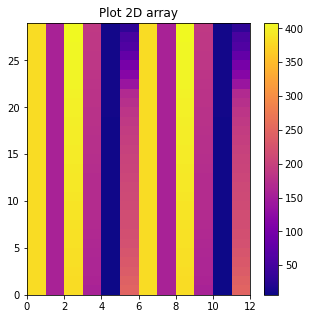

In [132]:
a_gvert = grilla_vertical(fila,inicio)[0]
a_gvert=np.asarray(a_gvert)
b_gvert = grilla_vertical(fila+2,inicio)[0]
b_gvert=np.asarray(a_gvert)

a = np.array((1,22,3))
print(f"type a_gvert:{type(b_gvert)} type a: {type(a)} " )




b = np.array((2,3,4)) 
c =np.column_stack((a_gvert,b_gvert))

print(type(c))

fig = plt.figure(figsize=(5,5)) #columnas y filas del array
plt.pcolormesh(c,cmap="plasma")
plt.title("Plot 2D array")
plt.colorbar()
plt.show()



In [ ]:
#cálculo de la distancia  
lf= indice_final(np_array, recta_vec) # indice final de intersección  # PUNTO 2 P2

 
    
int_i= np.asarray([inicio,np_array[inicio]])#convertir los puntos iniciales en el  array  PUNTO DE INICIO P1
int_f= np.asarray([lf,np_array[lf]])#convertir los puntos finales en el  array 
depth_i = distancia(int_i, int_f) #cacula la distancia 

print(depth_i)

vec_angle_depth = (angle(punto_inicio[0],punto_inicio[1],arr_x[inicio], np_array[inicio]), depth_i)


In [ ]:
print(vec_angle_depth)

### cálculo de la atenuación

In [ ]:
depthdEdX= dEdx*depth_i
print(depthdEdX)

### análisis del ángulo

In [ ]:
arr_t = np.linspace(inicio,columnas-1,columnas-inicio)

plt.title("Evolución del ángulo")
plt.xlabel("Índice")
plt.ylabel("Valor del ángulo")
plt.xlim([punto_inicio[0], len(arr_x)]) # limita el rango en el que se muestra el eje Y
plt.axvline(x = inicio, color = 'b', label = 'axvline - full height')
plt.axvline(x = lf, color = 'b', label = 'axvline - full height')


plt.plot(arr_t, recta_angle, color="red", label="Evolución del ángulo de apertura") 

In [ ]:
vec_angle=[]
vec_angle_energy = []
vec_angle_perindex = []
vec_angle_energy = []  

#esto genera el ángulo 
for j in range(inicio,len(arr_x)):        
    an=angle(punto_inicio[0],punto_inicio[1],arr_x[j], np_array[j])
    vec_angle.append(an) 
    recta_angle = np.asarray(vec_angle)  
 

num_bins = 20
plt.title("Distribución del ángulo")
plt.hist(recta_angle, num_bins)  
plt.show()

In [ ]:
### Plot del perfil y la gráfica 
plt.ylim([xplotrango, yplotrango ]) # limita el rango en el que se muestra el eje Y
plt.plot(recta_vec) 
plt.axvline(x = inicio, color = 'b', label = 'axvline - full height')
plt.axvline(x = punto_inicio[0], color = 'b', label = 'axvline - full height')

plt.axhline(y = punto_inicio[1], color = 'b', label = 'axvline - full height')

plt.plot(np_array)


In [ ]:
vec_angle_energy = (angle(punto_inicio[0],punto_inicio[1],arr_x[inicio], np_array[inicio]), depthdEdX)
print (vec_angle_energy )


## Cargar los datos del flujo de muones simulados

### Distribución de muones atmosféricos en la superficie 

- 12 column format is:
- CorsikaId px py pz x y z shower_id prm_id prm_energy prm_theta prm_phi

In [ ]:
datacorsikashw = pd.read_csv('/home/justus/Documentos/cosmicraysuni/CORSIKA_production/c_data/salida_d_2.shw', sep =" ", header=None, skiprows= 6)


#shower = datacorsikashw.fillna(0)
#df_limpio=df.drop(columns=626)#eliminar la última columna 
#df_limpio.head() 

In [ ]:
datacorsikashw=datacorsikashw.drop([0])#eliminar la primera fila 

datacorsikashw.head() 

In [ ]:
#print(datacorsikashw.dtypes)  
muonflux = datacorsikashw[(datacorsikashw[0]== 5) | (datacorsikashw[0]== 6)  ] 

points = len(muonflux)
print(points)


In [ ]:
muonflux.head()

In [ ]:
pxpypz=muonflux.iloc[:,[1,2,3]].to_numpy() #seleccion de las colummnas de muones + y - 
type(pxpypz)
print(pxpypz[0])

In [ ]:
muonp2 = []
muoncos = []
muontheta = []
for i in range(0, points, 1):
    p2 = pxpypz[i][0]*pxpypz[i][0]+pxpypz[i][1]*pxpypz[i][1]+pxpypz[i][2]*pxpypz[i][2]
    cos = pxpypz[i][2]/(np.sqrt(p2))
    arcos = (np.arccos(cos))*360/(2*np.pi)
    muonp2.append(p2)
    muoncos.append(cos)
    muontheta.append(arcos)


In [ ]:
 
for i in range(0,10,1):
    print(muontheta[i])

In [ ]:
 
for i in range(0,10,1):
    print(muoncos[i])

In [ ]:
#plt.hist(muontheta, bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90]) 
num_bins = 100
plt.hist(muontheta, num_bins) 

plt.title("histogram") 
plt.show()

In [ ]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

y = array([12, 11, 13, 15, 16, 16, 15, 14, 15, 12, 11, 12, 8, 10, 9, 7, 6])
x = array(range(len(y)))

def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c):
    return a*x**3+b*x+c

def func3(x, a, b, c):
    return a*x**3+b*x**2+c

def func4(x, a, b, c):
    return a*exp(b*x)+c

params, covs = curve_fit(func1, x, y)
print("params: ", params)
print("covariance: ", covs)

params, _ = curve_fit(func1, x, y)
a, b, c = params[0], params[1], params[2]
yfit1 = a*x**2+b*x+c

params, _  = curve_fit(func2, x, y)
a, b, c = params[0], params[1], params[2]
yfit2 = a*x**3+b*x+c

params, _  = curve_fit(func3, x, y)
a, b, c = params[0], params[1], params[2]
yfit3 = a*x**3+b*x**2+c

params, _  = curve_fit(func4, x, y)
a, b, c = params[0], params[1], params[2]
yfit4 = a*exp(x*b)+c

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.plot(x, yfit2, label="y=a*x^3+b*x+c")
plt.plot(x, yfit3, label="y=a*x^3+b*x^2*c")
plt.plot(x, yfit4, label="y=a*exp(b*x)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [ ]:
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, I, n):
    return (I)*np.cos(x)*np.sin(x)


# 3.) Generate exponential and gaussian data and histograms.
#data = np.random.exponential(scale=2.0, size=100)
#data2 = np.random.normal(loc=3.0, scale=0.3, size=100)
bins = np.linspace(0, 90, 352552)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
#data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
#data_entries = data_entries_1 + data_entries_2
#binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, bins_1, muontheta)
print(popt)

plt.hist(muontheta,bins,  label="y-original")
#plt.plot(bins, fit_function, label="y=a*x^2+b*x+c")

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Generate exponential and gaussian data and histograms.
data = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)
bins = np.linspace(0, 6, 61)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
data_entries = data_entries_1 + data_entries_2
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])
print(popt)

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

### Flujo de muones atmosféricos en la superficie

In [ ]:
datacorsikahst = pd.read_csv('/home/justus/Documentos/cosmicraysuni/CORSIKA_production/c_data/salida.hst', sep =" ", header=None, skiprows= 5)
showerhst=datacorsikahst.drop([157, 158,159, 160, 161, 162])#eliminar la última columna 
showerhst=showerhst.drop(columns=14)#eliminar la última columna 
 
showerhst

In [ ]:
muonshower=showerhst.drop([0])#eliminar la primera fila 
muonshower[0] = muonshower[0].astype(float) 
muonshower[4] = muonshower[4].astype(float) 
muonshower[5] = muonshower[5].astype(float) 
muonshower[13] = muonshower[13].astype(float) 
 

In [ ]:
 

# we make a plot of the results for each offset
fig, ax = plt.subplots()
colors = ["crimson", "dodgerblue"]
    

muonshower.plot(ax=ax, kind = 'scatter', x=0, y=5, color = "green", label="muon+")
muonshower.plot(ax=ax, kind = 'scatter', x=0, y=4, color="red", label="muon-")
muonshower.plot(ax=ax, kind = 'scatter', x=0, y=13, color="blue", label="total")

plt.xlabel("Energy (GeV)")
plt.ylabel("Flux")
plt.legend()
        
        
plt.xscale("log")
plt.yscale("log")
plt.show()

#### Convertir en numpy un conjunto de datos

In [ ]:


#energymuon=muonshower.iloc[:,[0,4,5,13]].to_numpy() #seleccion de las colummnas de muones + y - 


### Links revisados

- https://datatofish.com/convert-string-to-float-dataframe/
- https://www.w3schools.com/python/pandas/pandas_plotting.asp
- https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values
- https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm#:~:text=NumPy%20has%20a%20numpy.,variable%20height%20corresponding%20to%20frequency.
- https://riptutorial.com/scipy/example/31081/fitting-a-function-to-data-from-a-histogram
- https://riptutorial.com/scipy/example/31081/fitting-a-function-to-data-from-a-histogram

In [ ]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt

# data to be plotted
x = np.arange(0, 1.57, 0.04)
y = 3*np.sin(x)*(np.cos(x))**2

# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()
